<a href="https://colab.research.google.com/github/CliffBooth/telecom_labs/blob/main/code/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
# Get thinkdsp.py
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
from thinkdsp import *
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# **Лабараторная работа №1**

**Exercise #1.2**

Go to http://freesound.org and download a sound sample
that includes music, speech, or other sounds that have a well-defined pitch.
Select a roughly half-second segment where the pitch is constant. Compute
and plot the spectrum of the segment you selected. What connection can you
make between the timbre of the sound and the harmonic structure you see in
the spectrum?

Use high_pass, low_pass, and band_stop to filter out some of the harmonics.
Then convert the spectrum back to a wave and listen to it. How does the sound
relate to the changes you made in the spectrum?

Загрузим .wav файл, сохраненный в моем репозитории на гитхабе.

In [129]:
if not os.path.exists("trumpet.wav"):
  !wget https://github.com/CliffBooth/telecom_labs/raw/main/samples/trumpet.wav
wave = read_wave('trumpet.wav')
wave.make_audio()

График волны:

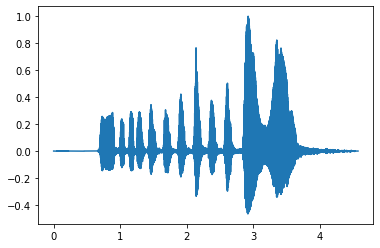

In [130]:
wave.plot()

Выберем полсекундный отрезок с постоянной высотой.

In [131]:
start = 0.5
duration = 0.5
segment = wave.segment(start, duration)
segment.make_audio()

Построим график сегмента:

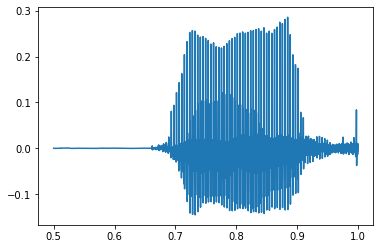

In [132]:
segment.plot()

 Построим спектр сегмента до 4000 Гц

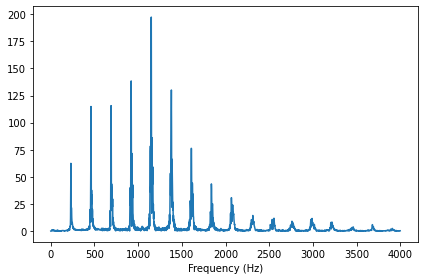

In [133]:
spectrum = segment.make_spectrum()
spectrum.plot(high=4000)
decorate(xlabel='Frequency (Hz)')

Посмотрим на пики спектра в порядку убывания:

In [134]:
spectrum.peaks()[:10]

[(197.3273749513319, 1150.0),
 (188.67875341629798, 1148.0),
 (138.45352894416652, 920.0),
 (130.11710283980153, 1380.0),
 (126.24380647951595, 1152.0),
 (122.59195851895944, 1378.0),
 (116.1451982656223, 1146.0),
 (115.70548632497977, 690.0),
 (114.89089691602553, 460.0),
 (114.13059684147524, 918.0)]

Доминирующая частота = 1150, основная частота = 230. Высота звука, который мы воспринимаем - это, как правило, основная частота.

Теперь попробуем отфильтровать высокие частоты:

In [135]:
spectrum.low_pass(1500)
spectrum.make_wave().make_audio()

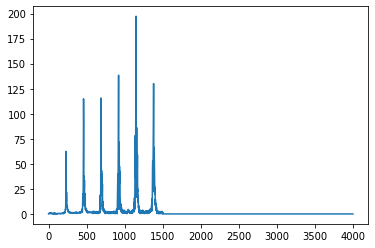

In [136]:
spectrum.plot(4000)

Звук стал более низким и менее наполненным

Теперь отфильтруем нижние частоты:

In [137]:
spectrum = segment.make_spectrum()
spectrum.high_pass(1000)
spectrum.make_wave().make_audio()

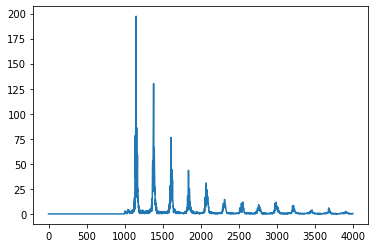

In [138]:
spectrum.plot(4000)

**Exercise #1.3**

Synthesize a compound signal by creating SinSignal and CosSignal objects and adding them up. Evaluate the signal to get a Wave, and listen
to it. Compute its Spectrum and plot it. What happens if you add frequency
components that are not multiples of the fundamental?

Построим наш сигнал и пктем сложения синусоидальных сигналов

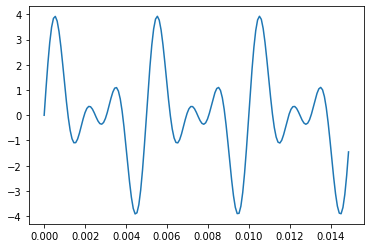

In [139]:
signal = SinSignal(freq=200, amp=1.0) + SinSignal(freq=400, amp=2.0) + SinSignal(freq=600, amp=1.5)
signal.plot()

Сделаем волну из сигнала:

In [140]:
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

Все частоты всех компонентов сигнала являются кратными 200 (гармониками).

Помтроим спектр:

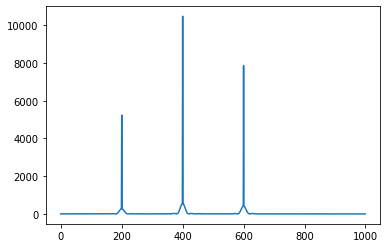

In [141]:
spectrum2 = wave2.make_spectrum()
spectrum2.plot(high = 1000)

Теперь добавим в сигнал компоненту с частотой не кратной основной и мы услышим резкий высокий звук


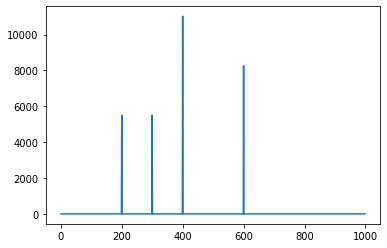

In [142]:
signal += SinSignal(freq=300)
wave3 = signal.make_wave()
wave3.make_spectrum().plot(high=1000)
wave3.make_audio()

**Exercice #1.4**

Write a function called stretch that takes a Wave and a stretch
factor and speeds up or slows down the wave by modifying ts and framerate.
Hint: it should only take two lines of code.

Напиешм функцию и применим ее к волне из нашей аудиозаписи:

In [143]:
wave4 = read_wave('trumpet.wav')
def stretch(wave, stretch_factor):
  wave.framerate *= stretch_factor
  wave.ts *= stretch_factor
stretch(wave4, 2)
wave4.make_audio()

Построим график получившейся волны:

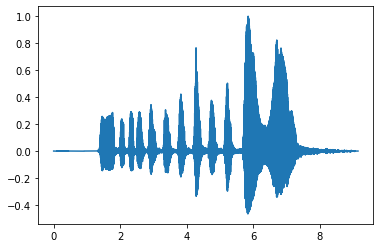

In [144]:
wave4.plot()